# Libraries/Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import nbformat

# Basic Analysis

### Sales

In [2]:
sales_path = "data/sales.csv"
df_sales = pd.read_csv(sales_path)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         878503 non-null  object 
 1   Time                         878503 non-null  object 
 2   Item Code                    878503 non-null  int64  
 3   Quantity Sold (kilo)         878503 non-null  float64
 4   Unit Selling Price (RMB/kg)  878503 non-null  float64
 5   Sale or Return               878503 non-null  object 
 6   Discount (Yes/No)            878503 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 46.9+ MB


### Product Loss

In [3]:
product_loss_path = "data/product_loss.csv"
df_product_loss = pd.read_csv(product_loss_path)
df_product_loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item Code      251 non-null    int64  
 1   Item Name      251 non-null    object 
 2   Loss Rate (%)  251 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


### Products

In [4]:
products_path = "data/products.csv"
df_products = pd.read_csv(products_path)
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


### Retail Price

In [5]:
retail_price_path = "data/retail_price.csv"
df_retail_price = pd.read_csv(retail_price_path)
df_retail_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55982 entries, 0 to 55981
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      55982 non-null  object 
 1   Item Code                 55982 non-null  int64  
 2   Wholesale Price (RMB/kg)  55982 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


# Top 10 Sales

In [6]:
df_total_sales = (
    df_sales[df_sales["Sale or Return"] == "sale"]  # Filtrar ventas reales
    .groupby("Item Code", as_index=False)["Quantity Sold (kilo)"]
    .sum()
    .merge(df_products, on="Item Code", how="left")  # Combinar con datos del producto
)
df_total_sales.head()

,Item Code,Quantity Sold (kilo),Item Name,Category Code,Category Name
0,102900005115168,899.837,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,333.485,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115250,2813.715,Xixia Black Mushroom (1),1011010801,Edible Mushroom
3,102900005115625,121.020,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
4,102900005115748,718.676,White Caitai,1011010101,Flower/Leaf Vegetables


In [7]:
df_ordered = df_total_sales.sort_values(by=["Quantity Sold (kilo)", "Item Name"], ascending=[False, True]).reset_index(drop=True)
df_ordered.head()

,Item Code,Quantity Sold (kilo),Item Name,Category Code,Category Name
0,102900011016701,28181.741,Wuhu Green Pepper (1),1011010504,Capsicum
1,102900005116714,27555.945,Broccoli,1011010201,Cabbage
2,102900005116899,27166.459,Net Lotus Root (1),1011010402,Aquatic Tuberous Vegetables
3,102900005115960,19196.094,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
4,102900005115779,15915.422,Yunnan Shengcai,1011010101,Flower/Leaf Vegetables


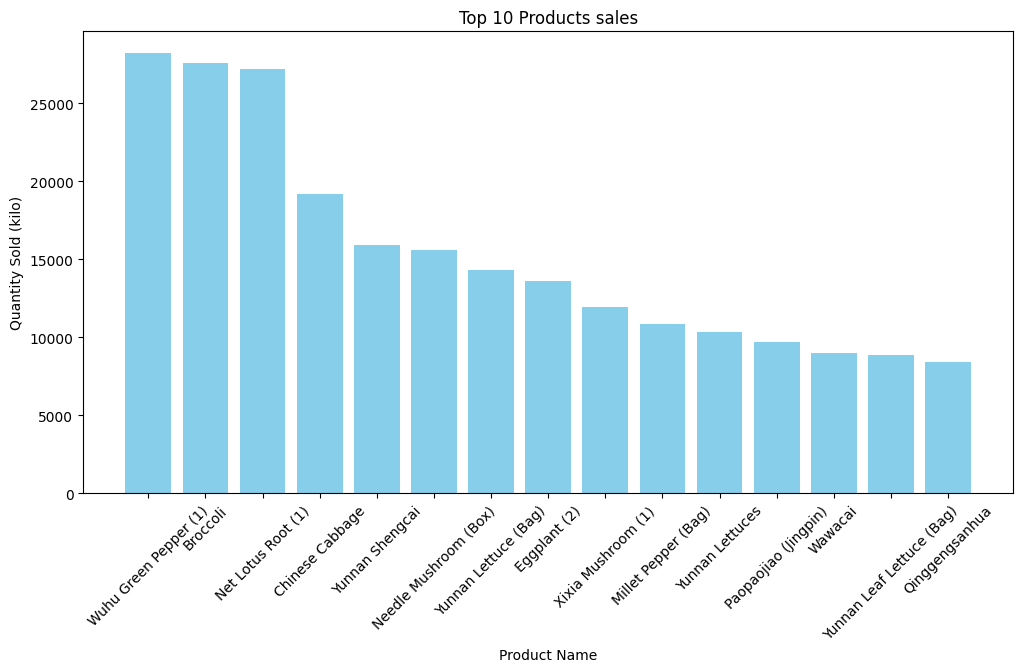

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(df_ordered['Item Name'].head(15), df_ordered['Quantity Sold (kilo)'].head(15), color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Products sales')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold (kilo)')
plt.show()

In [9]:
fig = px.bar(
    df_ordered.head(15),
    x='Item Name',
    y='Quantity Sold (kilo)',
    title='Top 15 Product Sales',
    labels={
        'Item Name': 'Product Name',
        'Quantity Sold (kilo)': 'Quantity Sold (kg)'
    },
    color_discrete_sequence=['skyblue']
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()